In [1]:
import numpy as np
import scipy.integrate as sci
import matplotlib.pyplot as plt

In [6]:
class Parameters(object):
    pass

par = Parameters()
par.lambd = 1

def control(x):
    return - par.lambd * (x[1] + x[0]**2)**2 - x[0] - 2 * x[0] * (x[0]**2 - x[0]**3 + x[1])
    
def rhs(t, x):
    dxdt = np.zeros(2)
    
    dxdt[0] = x[0]**2 - x[0]**3 + x[1]
    dxdt[1] = control(x)
    
    return dxdt

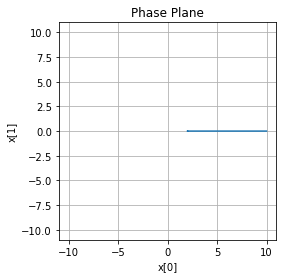

In [26]:
t0, tf, dt = 0, 1000, 0.1
# t0, tf, dt = 0, 100, 0.1
t_sol = np.arange(t0, tf, dt)

x0 = [10, 0]

sol = sci.solve_ivp(rhs, (t0, tf), x0, t_eval = t_sol)

x_sol = sol.y.T

pltlim = 1.1*max(max(x_sol[:,0]), max(x_sol[:,1]))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlim(-pltlim, pltlim)
plt.ylim(-pltlim, pltlim)
ax.plot(x_sol[:, 0], x_sol[:, 1])
ax.grid(True)
ax.set_title('Phase Plane')
ax.set_ylabel("x[1]")
ax.set_xlabel("x[0]")
ax.set_aspect('equal')

In [12]:
class Parameters(object):
    pass

par = Parameters()
par.lambd = 1

def control(x):
    return - x**2
    
def rhs_one(t, x):
    dxdt = np.zeros(1)
    
    dxdt = x**2 - x**3 + control(x)
    
    return dxdt

Text(0.5, 0, 't')

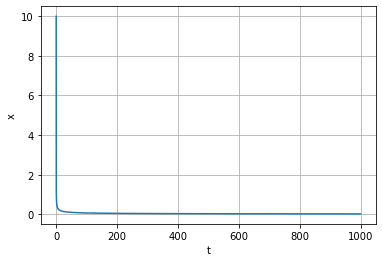

In [25]:
t0, tf, dt = 0, 1000, 0.1
# t0, tf, dt = 0, 100, 0.1
t_sol = np.arange(t0, tf, dt)

x0 = [10]

sol = sci.solve_ivp(rhs_one, (t0, tf), x0, t_eval = t_sol)

x_sol = sol.y.T
t = sol.t

# pltlim = 1.1*max(x_sol[:])

fig = plt.figure()
ax = fig.add_subplot(111)
# plt.xlim(0,  pltlim)
# plt.ylim(-pltlim, pltlim)
ax.plot(t, x_sol)
ax.grid(True)
# ax.set_title('Phase Plane')
ax.set_ylabel("x")
ax.set_xlabel("t")
# ax.set_aspect('equal')